In [1]:
import mytry
import matplotlib.pyplot as plt
import os
from utils import evaluate as my_eval
from utils import model_MLP as my_MLP

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [2]:
EPOCH = 1000
TARGET_CATEGORY = '한식음식점'

filepath = "./data/seoul_preprocessed2_y_nextquarter.csv"
savepath = os.path.join('./log', TARGET_CATEGORY)

In [3]:
filepath = "./data/seoul_preprocessed2_y_nextquarter.csv"

# Raw
x_train, y_train, x_test, y_test, scaler_raw = mytry.get_traintest(
    filepath=filepath,
    pred_category=TARGET_CATEGORY, 
    y_next_quarter=True, 
    random_split=True, 
    norm=None, 
    pca=False
)

# MinMMax
scaler_minmax = MinMaxScaler()
x_train_minmax, x_test_minmax = mytry.__get_normed(x_train, x_test, scaler_minmax)
y_train_minmax, y_test_minmax = mytry.__get_normed(y_train, y_test, scaler_minmax)

# Standard
scaler_std = StandardScaler()
x_train_std, x_test_std = mytry.__get_normed(x_train, x_test, scaler_std)
y_train_std, y_test_std = mytry.__get_normed(y_train, y_test, scaler_std)

# PCA
scaler_pca = StandardScaler()
pca = PCA()
x_train_pca, x_test_pca = mytry.__get_normed(x_train, x_test, scaler_pca)
y_train_pca, y_test_pca = mytry.__get_normed(y_train, y_test, scaler_pca)
x_train_pca, x_test_pca = mytry.___get_PCA(x_train_pca, x_test_pca, pca)

[train] 2017_1 : (1421, 30), accumulate : (1421, 30)
[train] 2017_2 : (1421, 30), accumulate : (2842, 30)
[train] 2017_3 : (1421, 30), accumulate : (4263, 30)
[train] 2017_4 : (1421, 30), accumulate : (5684, 30)
[train] 2018_1 : (1421, 30), accumulate : (7105, 30)
[train] 2018_2 : (1421, 30), accumulate : (8526, 30)
[train] 2018_3 : (1421, 30), accumulate : (9947, 30)
[test] 2019_1 : (1421, 30), accumulate : (1421, 30)
[test] 2019_2 : (1421, 30), accumulate : (2842, 30)
[test] 2019_3 : (1421, 30), accumulate : (4263, 30)
[test] 2018_4 : (1421, 30), accumulate : (5684, 30)
x_header ['남성연령대_10_유동인_수', '남성연령대_20_유동인_수', '남성연령대_30_유동인_수', '남성연령대_40_유동인_수', '남성연령대_50_유동인_수', '남성연령대_60_유동인_수', '여성연령대_10_유동인_수', '여성연령대_20_유동인_수', '여성연령대_30_유동인_수', '여성연령대_40_유동인_수', '여성연령대_50_유동인_수', '여성연령대_60_유동인_수'] y_header ['다음분기_매출_금액']
random split
pca ratios [0.79 0.11 0.07 0.02 0.01 0.01 0.   0.   0.   0.   0.   0.  ]
pca ratios [0.79 0.11 0.07 0.02 0.01 0.01 0.   0.   0.   0.   0.   0.  ]
pca top-3


In [4]:
dataset_raw =    [x_train, y_train, x_test, y_test]
dataset_minmax = [x_train_minmax, y_train_minmax, x_test_minmax, y_test_minmax]
dataset_std =    [x_train_std, y_train_std, x_test_std, y_test_std]
dataset_pca =    [x_train_pca, y_train_pca, x_test_pca, y_test_pca]

# Model training

## LGBM

In [5]:
model_LGBM_raw = mytry.main(
    modelname='LGBM_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw
)

------- evaluate LGBM with raw -------
RMSE : 1800718840.346463
R2 : 0.789587
----------------------------
[2897986.30389838] 4690
평균 오차 618%
최대 오차 489690%
최소 오차 0%


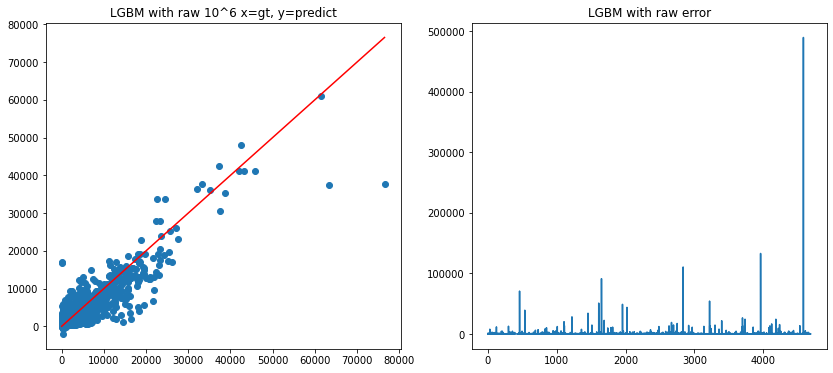

In [6]:
errs_LGBM_raw = my_eval.eval_regression(y_test, model_LGBM_raw.predict(x_test), scaler=scaler_raw, model_name='LGBM with raw', savepath=savepath)

In [7]:
model_LGBM_minmax = mytry.main(
    modelname='LGBM_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax
)

In [8]:
model_LGBM_std = mytry.main(
    modelname='LGBM_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std
)

In [9]:
model_LGBM_pca = mytry.main(
    modelname='LGBM_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca
)

## 4-MLP [12, 6, 1]

In [10]:
model_4MLP_raw, hist_4MLP_raw = mytry.main(
    modelname='4-MLP_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw,
    n_hidden=2,
    epoch=EPOCH
)

...................../log/한식음식점/4-MLP_raw-epoch:0999-val_mse:6383586389983756288.0000.hdf5 saved


In [ ]:
model_4MLP_minmax, hist_4MLP_minmax = mytry.main(
    modelname='4-MLP_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax,
    n_hidden=2,
    epoch=EPOCH
)

.
Epoch 00013: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00018: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00028: ReduceLROnPlateau reducing learning rate to 1e-06.
..........

In [ ]:
model_4MLP_std, hist_4MLP_std = mytry.main(
    modelname='4-MLP_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std,
    n_hidden=2,
    epoch=EPOCH
)

In [ ]:
model_4MLP_pca, hist_4MLP_pca = mytry.main(
    modelname='4-MLP_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca,
    n_hidden=2,
    epoch=EPOCH
)

## 5-MLP [24, 12, 6, 1]

In [ ]:
model_5MLP_raw, hist_5MLP_raw = mytry.main(
    modelname='5-MLP_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw,
    n_hidden=3,
    epoch = EPOCH
)

In [ ]:
model_5MLP_minmax, hist_5MLP_minmax = mytry.main(
    modelname='5-MLP_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax,
    n_hidden=3,
    epoch = EPOCH
)

In [ ]:
model_5MLP_std, hist_5MLP_std = mytry.main(
    modelname='5-MLP_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std,
    n_hidden=3,
    epoch = EPOCH
)

In [ ]:
model_5MLP_pca, hist_5MLP_pca = mytry.main(
    modelname='5-MLP_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca,
    n_hidden=3,
    epoch = EPOCH
)

# Evaluate

## LGBM

In [ ]:
errs_LGBM_raw = my_eval.eval_regression(y_test, model_LGBM_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='LGBM with raw', savepath=savepath)

In [ ]:
errs_LGBM_minmax = my_eval.eval_regression(y_test_minmax, model_LGBM_minmax.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='LGBM with minmax norm', savepath=savepath)

In [ ]:
errs_LGBM_std = my_eval.eval_regression(y_test_std, model_LGBM_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='LGBM with std norm', savepath=savepath)

In [ ]:
errs_LGBM_pca = my_eval.eval_regression(y_test_pca, model_LGBM_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='LGBM with PCA', savepath=savepath)

## 4-MLP

In [ ]:
errs_4MLP_raw = my_eval.eval_regression(y_test, model_4MLP_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='4-MLP with raw', savepath=savepath)

In [ ]:
errs_4MLP_minmax = my_eval.eval_regression(y_test_minmax, model_4MLP_minmax.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='4-MLP with minmax norm', savepath=savepath)

In [ ]:
errs_4MLP_std = my_eval.eval_regression(y_test_std, model_4MLP_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='4-MLP with std', savepath=savepath)

In [ ]:
errs_4MLP_pca = my_eval.eval_regression(y_test_pca, model_4MLP_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='4-MLP with PCA', savepath=savepath)

# 5-MLP

In [ ]:
errs_5MLP_raw = my_eval.eval_regression(y_test, model_5MLP_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='5-MLP with raw', savepath=savepath)

In [ ]:
errs_5MLP_minmax = my_eval.eval_regression(y_test_minmax, model_5MLP_raw.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='5-MLP with minmax norm', savepath=savepath)

In [ ]:
errs_5MLP_std = my_eval.eval_regression(y_test_std, model_5MLP_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='5-MLP with std norm', savepath=savepath)

In [ ]:
errs_5MLP_pca = my_eval.eval_regression(y_test_pca, model_5MLP_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='5-MLP with PCA', savepath=savepath)

# Appendix - MLP training history

In [ ]:
my_MLP.plot_history(hist_4MLP_raw)

In [ ]:
my_MLP.plot_history(hist_4MLP_minmax)

In [ ]:
my_MLP.plot_history(hist_4MLP_std)

In [ ]:
my_MLP.plot_history(hist_4MLP_pca)

In [ ]:
my_MLP.plot_history(hist_5MLP_raw)

In [ ]:
my_MLP.plot_history(hist_5MLP_minmax)

In [ ]:
my_MLP.plot_history(hist_5MLP_std)

In [ ]:
my_MLP.plot_history(hist_5MLP_pca)